### Data Cleaning

In [1]:
# Import libraries
import pandas as pd
import sqlite3
import psycopg2

In [2]:
# Load MLB batting statistics
batter_stats = pd.read_csv('data/batter_stats.csv')

batter_stats.head()

,Rk,Player,HR,AB,Season,Age,Team,Lg,G,PA,...,SLG,OPS,OPS+,TB,GIDP,HBP,SH,SF,IBB,Pos
0,1,Giancarlo Stanton,59,597,2017,27,MIA,NL,159,692,...,0.631,1.007,169,377,13,7,0,3,13,*9/HD
1,2,Pete Alonso,53,597,2019,24,NYM,NL,161,693,...,0.583,0.941,147,348,13,21,0,3,6,*3/HD
2,3,Aaron Judge,52,542,2017,25,NYY,AL,155,678,...,0.627,1.049,171,340,15,5,0,4,11,*9D/H
3,4,Eugenio Suárez,49,575,2019,27,CIN,NL,159,662,...,0.572,0.930,131,329,12,11,0,6,4,*5/HD
4,5,Khris Davis,48,576,2018,30,OAK,AL,151,654,...,0.549,0.874,137,316,16,12,0,7,5,*D7/H


In [3]:
# Display the columns in the dataframe
batter_stats.columns

Index(['Rk', 'Player', 'HR', 'AB', 'Season', 'Age', 'Team', 'Lg', 'G', 'PA',
       'AB.1', 'R', 'H', '1B', '2B', '3B', 'HR.1', 'RBI', 'SB', 'CS', 'BB',
       'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GIDP', 'HBP', 'SH',
       'SF', 'IBB', 'Pos'],
      dtype='object')

In [4]:
# Drop unnecessary columns
batter_stats = batter_stats[['Player', 'Season', 'BA', 'SLG']]

batter_stats.head()

,Player,Season,BA,SLG
0,Giancarlo Stanton,2017,0.281,0.631
1,Pete Alonso,2019,0.260,0.583
2,Aaron Judge,2017,0.284,0.627
3,Eugenio Suárez,2019,0.271,0.572
4,Khris Davis,2018,0.247,0.549


In [5]:
# Function to reformat player names
def reorder_name(name):
  name_parts = name.split()
  if len(name_parts) >= 2:
    last_name = name_parts[-1]
    first_name = " ".join(name_parts[:-1])
    return f"{last_name}, {first_name}"
  else:
    return name

In [6]:
# Reorder the names in the Dataframe
batter_stats['Player'] = batter_stats['Player'].apply(reorder_name)

batter_stats.head()

,Player,Season,BA,SLG
0,"Stanton, Giancarlo",2017,0.281,0.631
1,"Alonso, Pete",2019,0.260,0.583
2,"Judge, Aaron",2017,0.284,0.627
3,"Suárez, Eugenio",2019,0.271,0.572
4,"Davis, Khris",2018,0.247,0.549


In [7]:
# Load StatCast statistics
statcast = pd.read_csv('data/statcast.csv')

statcast

,id,rank,year,player,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,average_ev,fly_ball_line_drive_ev,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
0,1,1,2022,"Judge, Aaron",341,14.6,37.8,118.4,95.8,100.2,89.1,465,205,413.0,210,61.6,20.3,91,26.7,15.8
1,2,2,2022,"Alvarez, Yordan",304,12.1,40.1,117.4,95.5,98.2,92.7,469,193,403.0,186,61.2,23.7,59,19.4,12.7
2,3,3,2022,"Trout, Mike",234,24.7,37.2,114.4,91.7,94.9,87.7,472,218,407.0,120,51.3,16.5,46,19.7,11.6
3,4,4,2022,"Schwarber, Kyle",312,18.9,34.6,114.8,93.3,99.7,87.2,468,197,415.0,170,54.5,17.6,64,20.5,11.5
4,5,5,2022,"Stanton, Giancarlo",228,10.2,26.3,119.8,94.6,98.2,94.1,445,160,400.0,117,51.3,17.8,42,18.4,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,1979,246,2015,"Peña, Brayan",302,8.0,24.8,104.9,85.6,86.9,85.8,378,137,NaN,52,17.2,8.9,1,0.3,0.3
1979,1980,247,2015,"Reyes, José",431,13.3,28.1,108.4,84.6,86.0,85.9,419,151,386.0,80,18.6,8.8,1,0.2,0.2
1980,1981,248,2015,"Sogard, Eric",326,11.6,32.2,107.5,85.5,86.5,85.9,410,155,410.0,61,18.7,10.1,1,0.3,0.2
1981,1982,249,2015,"Revere, Ben",536,5.1,34.9,111.4,83.1,86.0,81.3,389,133,367.0,78,14.6,8.2,0,0.0,0.0


In [8]:
# Rename columns
statcast.rename(columns={
    'year': 'Season',
    'player': 'Player'
}, inplace=True)

statcast.head()

,id,rank,Season,Player,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,average_ev,fly_ball_line_drive_ev,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
0,1,1,2022,"Judge, Aaron",341,14.6,37.8,118.4,95.8,100.2,89.1,465,205,413.0,210,61.6,20.3,91,26.7,15.8
1,2,2,2022,"Alvarez, Yordan",304,12.1,40.1,117.4,95.5,98.2,92.7,469,193,403.0,186,61.2,23.7,59,19.4,12.7
2,3,3,2022,"Trout, Mike",234,24.7,37.2,114.4,91.7,94.9,87.7,472,218,407.0,120,51.3,16.5,46,19.7,11.6
3,4,4,2022,"Schwarber, Kyle",312,18.9,34.6,114.8,93.3,99.7,87.2,468,197,415.0,170,54.5,17.6,64,20.5,11.5
4,5,5,2022,"Stanton, Giancarlo",228,10.2,26.3,119.8,94.6,98.2,94.1,445,160,400.0,117,51.3,17.8,42,18.4,11.3


In [9]:
# Strip whitespace
statcast = statcast.map(lambda x: x.strip() if isinstance(x, str) else x)

statcast.head()

,id,rank,Season,Player,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,average_ev,fly_ball_line_drive_ev,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
0,1,1,2022,"Judge, Aaron",341,14.6,37.8,118.4,95.8,100.2,89.1,465,205,413.0,210,61.6,20.3,91,26.7,15.8
1,2,2,2022,"Alvarez, Yordan",304,12.1,40.1,117.4,95.5,98.2,92.7,469,193,403.0,186,61.2,23.7,59,19.4,12.7
2,3,3,2022,"Trout, Mike",234,24.7,37.2,114.4,91.7,94.9,87.7,472,218,407.0,120,51.3,16.5,46,19.7,11.6
3,4,4,2022,"Schwarber, Kyle",312,18.9,34.6,114.8,93.3,99.7,87.2,468,197,415.0,170,54.5,17.6,64,20.5,11.5
4,5,5,2022,"Stanton, Giancarlo",228,10.2,26.3,119.8,94.6,98.2,94.1,445,160,400.0,117,51.3,17.8,42,18.4,11.3


In [10]:
# Merge our DataFrames
batting_df = batter_stats.merge(statcast, how="inner", on=['Player', 'Season'])

batting_df

,Player,Season,BA,SLG,id,rank,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,...,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
0,"Stanton, Giancarlo",2017,0.281,0.631,1239,3,437,11.2,31.6,122.2,...,86.8,468,183,418.0,199,45.6,17.0,76,17.4,11.0
1,"Alonso, Pete",2019,0.260,0.583,748,11,417,14.8,36.9,118.3,...,85.9,489,189,414.0,176,42.7,13.7,66,15.8,9.5
2,"Judge, Aaron",2017,0.284,0.627,1237,1,338,15.8,38.2,121.1,...,88.6,496,216,413.0,185,54.7,15.1,87,25.7,12.8
3,"Suárez, Eugenio",2019,0.271,0.572,767,30,392,17.7,38.0,112.3,...,86.1,457,195,400.0,157,40.8,13.0,54,13.8,8.2
4,"Davis, Khris",2018,0.247,0.549,989,2,408,18.1,37.7,112.8,...,87.7,438,211,405.0,195,48.1,15.7,70,17.2,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,"Smith, Mallex",2018,0.296,0.406,1226,239,391,3.7,32.2,104.7,...,83.3,412,144,394.0,90,23.0,8.8,6,1.5,1.1
719,"Strange-Gordon, Dee",2017,0.308,0.375,1492,256,566,2.2,27.7,104.1,...,79.6,395,122,380.0,63,11.2,4.8,1,0.2,0.1
720,"Wolters, Tony",2019,0.262,0.329,986,249,299,10.1,37.5,103.4,...,83.1,413,166,361.0,59,19.7,8.6,0,0.0,0.0
721,"Hamilton, Billy",2019,0.218,0.275,987,250,234,15.2,32.1,99.9,...,81.1,374,155,NaN,17,7.3,2.5,0,0.0,0.0


In [11]:
# Replace all above-average BAs with 1 and below-average BAs with 0
batting_df.loc[batting_df['BA'] >= batting_df['BA'].quantile(0.5), 'BA'] = 1
batting_df.loc[batting_df['BA'] < batting_df['BA'].quantile(0.5), 'BA'] = 0

# Replace all above-average SLGs with 1 and below-average SLGs with 0
batting_df.loc[batting_df['SLG'] >= batting_df['SLG'].quantile(0.5), 'SLG'] = 1
batting_df.loc[batting_df['SLG'] < batting_df['SLG'].quantile(0.5), 'SLG'] = 0

# Rename columns
batting_df.rename(columns={
    'BA': 'BA > AVG',
    'SLG': 'SLG > AVG'
}, inplace=True)

batting_df.head()

,Player,Season,BA > AVG,SLG > AVG,id,rank,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,...,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
0,"Stanton, Giancarlo",2017,1.0,1.0,1239,3,437,11.2,31.6,122.2,...,86.8,468,183,418.0,199,45.6,17.0,76,17.4,11.0
1,"Alonso, Pete",2019,0.0,1.0,748,11,417,14.8,36.9,118.3,...,85.9,489,189,414.0,176,42.7,13.7,66,15.8,9.5
2,"Judge, Aaron",2017,1.0,1.0,1237,1,338,15.8,38.2,121.1,...,88.6,496,216,413.0,185,54.7,15.1,87,25.7,12.8
3,"Suárez, Eugenio",2019,1.0,1.0,767,30,392,17.7,38.0,112.3,...,86.1,457,195,400.0,157,40.8,13.0,54,13.8,8.2
4,"Davis, Khris",2018,0.0,1.0,989,2,408,18.1,37.7,112.8,...,87.7,438,211,405.0,195,48.1,15.7,70,17.2,10.7


In [12]:
# Exporting cleaned data to csv
batting_df.to_csv('data/batting_cleaned.csv', index=False)

### Storing Cleaned Data in SQLlite

In [13]:
# Set up a database using sqlite
conn = sqlite3.connect('Statcast_DB')

In [14]:
# Create a table for the cleaned batting data
batting_df.to_sql('batting_cleaned', conn, if_exists='replace')

723

In [15]:
# Import sqlite table back to df
# Query for the data/specific features we want to run
conn = sqlite3.connect('Statcast_DB')
initial_batting_df = pd.read_sql('SELECT player, season, `BA > AVG`, `SLG > AVG`, total_barrels, barrels_batted_balls_percentage, barrels_plate_appearance_percentage FROM batting_cleaned', conn)

In [16]:
# Display the data from created from the query
initial_batting_df

,Player,Season,BA > AVG,SLG > AVG,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
0,"Stanton, Giancarlo",2017,1.0,1.0,76,17.4,11.0
1,"Alonso, Pete",2019,0.0,1.0,66,15.8,9.5
2,"Judge, Aaron",2017,1.0,1.0,87,25.7,12.8
3,"Suárez, Eugenio",2019,1.0,1.0,54,13.8,8.2
4,"Davis, Khris",2018,0.0,1.0,70,17.2,10.7
...,...,...,...,...,...,...,...
718,"Smith, Mallex",2018,1.0,0.0,6,1.5,1.1
719,"Strange-Gordon, Dee",2017,1.0,0.0,1,0.2,0.1
720,"Wolters, Tony",2019,1.0,0.0,0,0.0,0.0
721,"Hamilton, Billy",2019,0.0,0.0,0,0.0,0.0


### Training the Random Forest Model

In [17]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [18]:
# Define features set
X = initial_batting_df.copy()
X.drop(['Player', 'Season', 'BA > AVG', 'SLG > AVG'], axis=1, inplace=True)
X.head()

,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
0,76,17.4,11.0
1,66,15.8,9.5
2,87,25.7,12.8
3,54,13.8,8.2
4,70,17.2,10.7


In [19]:
# Display the number of features in the dataframe
len(X.columns)

3

In [20]:
# Define target vector
y = initial_batting_df['SLG > AVG'].ravel()
y[:5]

array([1., 1., 1., 1., 1.])

In [21]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [22]:
# Create StandardScaler
scaler = StandardScaler()

In [23]:
# Fitting standard scaler
X_scaler = scaler.fit(X_train)

In [24]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=1)

In [26]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [27]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [28]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [29]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,72,17
Actual 1,19,73


Accuracy Score : 0.8011049723756906
Classification Report
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80        89
         1.0       0.81      0.79      0.80        92

    accuracy                           0.80       181
   macro avg       0.80      0.80      0.80       181
weighted avg       0.80      0.80      0.80       181



### Optimization Attempt #1: Increase Amount of Features

In [30]:
# Query for the entire dataset
complete_batting_df = pd.read_sql('SELECT * FROM batting_cleaned', conn)
complete_batting_df

,index,Player,Season,BA > AVG,SLG > AVG,id,rank,batted_ball_events,launch_angle,sweet_spot_percentage,...,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
0,0,"Stanton, Giancarlo",2017,1.0,1.0,1239,3,437,11.2,31.6,...,86.8,468,183,418.0,199,45.6,17.0,76,17.4,11.0
1,1,"Alonso, Pete",2019,0.0,1.0,748,11,417,14.8,36.9,...,85.9,489,189,414.0,176,42.7,13.7,66,15.8,9.5
2,2,"Judge, Aaron",2017,1.0,1.0,1237,1,338,15.8,38.2,...,88.6,496,216,413.0,185,54.7,15.1,87,25.7,12.8
3,3,"Suárez, Eugenio",2019,1.0,1.0,767,30,392,17.7,38.0,...,86.1,457,195,400.0,157,40.8,13.0,54,13.8,8.2
4,4,"Davis, Khris",2018,0.0,1.0,989,2,408,18.1,37.7,...,87.7,438,211,405.0,195,48.1,15.7,70,17.2,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,718,"Smith, Mallex",2018,1.0,0.0,1226,239,391,3.7,32.2,...,83.3,412,144,394.0,90,23.0,8.8,6,1.5,1.1
719,719,"Strange-Gordon, Dee",2017,1.0,0.0,1492,256,566,2.2,27.7,...,79.6,395,122,380.0,63,11.2,4.8,1,0.2,0.1
720,720,"Wolters, Tony",2019,1.0,0.0,986,249,299,10.1,37.5,...,83.1,413,166,361.0,59,19.7,8.6,0,0.0,0.0
721,721,"Hamilton, Billy",2019,0.0,0.0,987,250,234,15.2,32.1,...,81.1,374,155,NaN,17,7.3,2.5,0,0.0,0.0


In [31]:
# Define features set
X = complete_batting_df.copy()
X.drop(['Player', 'Season', 'BA > AVG', 'SLG > AVG','index','id','batted_ball_events','rank'], axis=1, inplace=True)
X.head()

,launch_angle,sweet_spot_percentage,max_ev,average_ev,fly_ball_line_drive_ev,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
0,11.2,31.6,122.2,92.0,100.0,86.8,468,183,418.0,199,45.6,17.0,76,17.4,11.0
1,14.8,36.9,118.3,90.7,96.6,85.9,489,189,414.0,176,42.7,13.7,66,15.8,9.5
2,15.8,38.2,121.1,95.0,100.5,88.6,496,216,413.0,185,54.7,15.1,87,25.7,12.8
3,17.7,38.0,112.3,89.3,93.1,86.1,457,195,400.0,157,40.8,13.0,54,13.8,8.2
4,18.1,37.7,112.8,92.5,97.2,87.7,438,211,405.0,195,48.1,15.7,70,17.2,10.7


In [32]:
# Display the number of features in the dataframe
len(X.columns)

15

In [33]:
# Define target vector
y = batting_df['SLG > AVG'].ravel()
y[:5]

array([1., 1., 1., 1., 1.])

In [34]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [35]:
# Create StandardScaler
scaler = StandardScaler()

In [36]:
# Fitting standard scaler
X_scaler = scaler.fit(X_train)

In [37]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [38]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=1)

In [39]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [40]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [41]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [42]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,74,15
Actual 1,13,79


Accuracy Score : 0.8453038674033149
Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84        89
         1.0       0.84      0.86      0.85        92

    accuracy                           0.85       181
   macro avg       0.85      0.85      0.85       181
weighted avg       0.85      0.85      0.85       181



In [43]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1250717621472621, 'total_barrels'),
 (0.10587208472324457, 'barrels_plate_appearance_percentage'),
 (0.08807735291326066, 'barrels_batted_balls_percentage'),
 (0.07217838248145475, 'hard_hit_95mph+'),
 (0.06889819238176186, 'hard_hit_percentage'),
 (0.06847079876282976, 'average_distance'),
 (0.06760488871806657, 'fly_ball_line_drive_ev'),
 (0.06150302338410279, 'sweet_spot_percentage'),
 (0.05688426289371835, 'launch_angle'),
 (0.0560083940480959, 'max_distance'),
 (0.050963108419454305, 'hard_hit_swing_percentage'),
 (0.047512553939268516, 'max_ev'),
 (0.04652031375851134, 'average_ev'),
 (0.04376035581846547, 'average_homerun'),
 (0.04067452561050305, 'ground_ball_ev')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

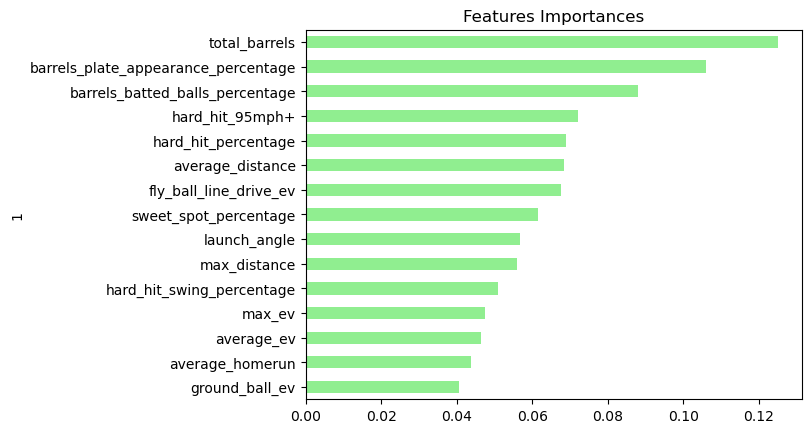

In [44]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

### Optimization Attempt #2: Adjusting Model Inputs

In [45]:
# Define a function that will handle running the model
# The function takes in 4 inputs: max depth of the forest, number of estimators, max features of the model, and
# allows the user to display the top 10 features by importance
def modeler(depth, cycles, features, show):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    scaler = StandardScaler()
    X_scaler = scaler.fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    rf_model = RandomForestClassifier(max_depth=depth, n_estimators=cycles, max_features=features, random_state=1)
    rf_model = rf_model.fit(X_train_scaled, y_train)
    predictions = rf_model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
    )
    acc_score = accuracy_score(y_test, predictions)
    print("Confusion Matrix")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")
    print(classification_report(y_test, predictions))

    if show == True:
        importance_data = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
        importance_df = pd.DataFrame(importance_data, columns = ['Importance','Feature Name'])
        return importance_df.head(10)

In [46]:
#Default (random_state=1)
modeler(10, 1000, 3, False)
#Max Depth -> 50
modeler(50, 1000, 3, False)
#Max Features -> 10
modeler(10, 1000, 10, False)
#Change N-estimators -> 5000 
modeler(10, 5000, 10, False)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,74,15
Actual 1,14,78


Accuracy Score : 0.8397790055248618
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84        89
         1.0       0.84      0.85      0.84        92

    accuracy                           0.84       181
   macro avg       0.84      0.84      0.84       181
weighted avg       0.84      0.84      0.84       181

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,74,15
Actual 1,13,79


Accuracy Score : 0.8453038674033149
Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84        89
         1.0       0.84      0.86      0.85        92

    accuracy                           0.85       181
   macro avg       0.85      0.85      0.85       181
weighted avg       0.85      0.85      0.85       181

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,73,16
Actual 1,14,78


Accuracy Score : 0.8342541436464088
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        89
         1.0       0.83      0.85      0.84        92

    accuracy                           0.83       181
   macro avg       0.83      0.83      0.83       181
weighted avg       0.83      0.83      0.83       181

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,73,16
Actual 1,14,78


Accuracy Score : 0.8342541436464088
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        89
         1.0       0.83      0.85      0.84        92

    accuracy                           0.83       181
   macro avg       0.83      0.83      0.83       181
weighted avg       0.83      0.83      0.83       181



### Optimization Attempt #3: Data Transformation

In [47]:
# Import libraries for transformation functions
import numpy as np
import math

In [48]:
# Define functions to handle the transformations
def square_value(value):
    sq_val = value*value
    return sq_val

def exponential(value):
    exp_val = np.exp(value)
    return exp_val

def sine(value):
    sin_val = math.sin(value)
    return sin_val

def cosine(value):
    cos_val = math.cos(value)
    return cos_val

In [49]:
# Copy the complete batting dataframe
op_batting_df = complete_batting_df.copy()
op_batting_df

,index,Player,Season,BA > AVG,SLG > AVG,id,rank,batted_ball_events,launch_angle,sweet_spot_percentage,...,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
0,0,"Stanton, Giancarlo",2017,1.0,1.0,1239,3,437,11.2,31.6,...,86.8,468,183,418.0,199,45.6,17.0,76,17.4,11.0
1,1,"Alonso, Pete",2019,0.0,1.0,748,11,417,14.8,36.9,...,85.9,489,189,414.0,176,42.7,13.7,66,15.8,9.5
2,2,"Judge, Aaron",2017,1.0,1.0,1237,1,338,15.8,38.2,...,88.6,496,216,413.0,185,54.7,15.1,87,25.7,12.8
3,3,"Suárez, Eugenio",2019,1.0,1.0,767,30,392,17.7,38.0,...,86.1,457,195,400.0,157,40.8,13.0,54,13.8,8.2
4,4,"Davis, Khris",2018,0.0,1.0,989,2,408,18.1,37.7,...,87.7,438,211,405.0,195,48.1,15.7,70,17.2,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,718,"Smith, Mallex",2018,1.0,0.0,1226,239,391,3.7,32.2,...,83.3,412,144,394.0,90,23.0,8.8,6,1.5,1.1
719,719,"Strange-Gordon, Dee",2017,1.0,0.0,1492,256,566,2.2,27.7,...,79.6,395,122,380.0,63,11.2,4.8,1,0.2,0.1
720,720,"Wolters, Tony",2019,1.0,0.0,986,249,299,10.1,37.5,...,83.1,413,166,361.0,59,19.7,8.6,0,0.0,0.0
721,721,"Hamilton, Billy",2019,0.0,0.0,987,250,234,15.2,32.1,...,81.1,374,155,NaN,17,7.3,2.5,0,0.0,0.0


In [50]:
# Drop unnecessary columns
op_batting_df.drop(['id','index'], axis=1, inplace=True)

In [51]:
# Create a list of features from the remaining columns
feature_list = list(op_batting_df.columns)
feature_list

['Player',
 'Season',
 'BA > AVG',
 'SLG > AVG',
 'rank',
 'batted_ball_events',
 'launch_angle',
 'sweet_spot_percentage',
 'max_ev',
 'average_ev',
 'fly_ball_line_drive_ev',
 'ground_ball_ev',
 'max_distance',
 'average_distance',
 'average_homerun',
 'hard_hit_95mph+',
 'hard_hit_percentage',
 'hard_hit_swing_percentage',
 'total_barrels',
 'barrels_batted_balls_percentage',
 'barrels_plate_appearance_percentage']

In [52]:
# Remove features that we don't want to transform
del(feature_list[0:6])

In [53]:
# Display the final list of features we want to transform
feature_list

['launch_angle',
 'sweet_spot_percentage',
 'max_ev',
 'average_ev',
 'fly_ball_line_drive_ev',
 'ground_ball_ev',
 'max_distance',
 'average_distance',
 'average_homerun',
 'hard_hit_95mph+',
 'hard_hit_percentage',
 'hard_hit_swing_percentage',
 'total_barrels',
 'barrels_batted_balls_percentage',
 'barrels_plate_appearance_percentage']

In [54]:
# Loop through the features we want to transform
# Add a new column for the feature transformation
# Transform and add data to the column
for name in feature_list:
    op_batting_df[name + '_squared'] = op_batting_df[name].apply(square_value)
    op_batting_df[name + '_sine'] = op_batting_df[name].apply(sine)
    op_batting_df[name + '_cosine'] = op_batting_df[name].apply(cosine)
    op_batting_df[name + '_exp'] = op_batting_df[name].apply(exponential)

op_batting_df.head()
    

,Player,Season,BA > AVG,SLG > AVG,rank,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,average_ev,...,total_barrels_cosine,total_barrels_exp,barrels_batted_balls_percentage_squared,barrels_batted_balls_percentage_sine,barrels_batted_balls_percentage_cosine,barrels_batted_balls_percentage_exp,barrels_plate_appearance_percentage_squared,barrels_plate_appearance_percentage_sine,barrels_plate_appearance_percentage_cosine,barrels_plate_appearance_percentage_exp
0,"Stanton, Giancarlo",2017,1.0,1.0,3,437,11.2,31.6,122.2,92.0,...,0.824331,1.014800e+33,302.76,-0.992659,0.120944,3.603496e+07,121.00,-0.999990,0.004426,59874.141715
1,"Alonso, Pete",2019,0.0,1.0,11,417,14.8,36.9,118.3,90.7,...,-0.999647,4.607187e+28,249.64,-0.091907,-0.995768,7.275332e+06,90.25,-0.075151,-0.997172,13359.726830
2,"Judge, Aaron",2017,1.0,1.0,1,338,15.8,38.2,121.1,95.0,...,0.569750,6.076030e+37,660.49,0.537322,0.843377,1.450001e+11,163.84,0.231510,0.972833,362217.449611
3,"Suárez, Eugenio",2019,1.0,1.0,30,392,17.7,38.0,112.3,89.3,...,-0.829310,2.830753e+23,190.44,0.943696,0.330815,9.846091e+05,67.24,0.940731,-0.339155,3640.950307
4,"Davis, Khris",2018,0.0,1.0,2,408,18.1,37.7,112.8,92.5,...,0.633319,2.515439e+30,295.84,-0.996900,-0.078678,2.950293e+07,114.49,-0.956635,-0.291289,44355.855130


In [55]:
# Define features set
X = op_batting_df.copy()
X.drop(['Player', 'Season', 'BA > AVG', 'SLG > AVG','batted_ball_events','rank'], axis=1, inplace=True)
X.head()

,launch_angle,sweet_spot_percentage,max_ev,average_ev,fly_ball_line_drive_ev,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,...,total_barrels_cosine,total_barrels_exp,barrels_batted_balls_percentage_squared,barrels_batted_balls_percentage_sine,barrels_batted_balls_percentage_cosine,barrels_batted_balls_percentage_exp,barrels_plate_appearance_percentage_squared,barrels_plate_appearance_percentage_sine,barrels_plate_appearance_percentage_cosine,barrels_plate_appearance_percentage_exp
0,11.2,31.6,122.2,92.0,100.0,86.8,468,183,418.0,199,...,0.824331,1.014800e+33,302.76,-0.992659,0.120944,3.603496e+07,121.00,-0.999990,0.004426,59874.141715
1,14.8,36.9,118.3,90.7,96.6,85.9,489,189,414.0,176,...,-0.999647,4.607187e+28,249.64,-0.091907,-0.995768,7.275332e+06,90.25,-0.075151,-0.997172,13359.726830
2,15.8,38.2,121.1,95.0,100.5,88.6,496,216,413.0,185,...,0.569750,6.076030e+37,660.49,0.537322,0.843377,1.450001e+11,163.84,0.231510,0.972833,362217.449611
3,17.7,38.0,112.3,89.3,93.1,86.1,457,195,400.0,157,...,-0.829310,2.830753e+23,190.44,0.943696,0.330815,9.846091e+05,67.24,0.940731,-0.339155,3640.950307
4,18.1,37.7,112.8,92.5,97.2,87.7,438,211,405.0,195,...,0.633319,2.515439e+30,295.84,-0.996900,-0.078678,2.950293e+07,114.49,-0.956635,-0.291289,44355.855130


In [56]:
# Display the shape of the X dataframe to ensure all transformations were added
X.shape

(723, 75)

In [57]:
# Define target vector
y = op_batting_df['SLG > AVG'].ravel()
y[:5]

array([1., 1., 1., 1., 1.])

In [58]:
# Display the Classification Report and Top 10 Important Features after the transformations
modeler(50,1000,3,True)

/Users/joshuaturk/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/utils/extmath.py:1156: RuntimeWarning: overflow encountered in square
  temp **= 2
/Users/joshuaturk/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/joshuaturk/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/joshuaturk/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:84: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,74,15
Actual 1,14,78


Accuracy Score : 0.8397790055248618
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84        89
         1.0       0.84      0.85      0.84        92

    accuracy                           0.84       181
   macro avg       0.84      0.84      0.84       181
weighted avg       0.84      0.84      0.84       181



,Importance,Feature Name
0,0.037070,total_barrels
1,0.034189,total_barrels_squared
2,0.030903,barrels_plate_appearance_percentage_exp
3,0.029434,barrels_plate_appearance_percentage_squared
4,0.026969,barrels_plate_appearance_percentage
5,0.026234,barrels_batted_balls_percentage_squared
6,0.024024,barrels_batted_balls_percentage
7,0.022268,hard_hit_95mph+_squared
8,0.020463,hard_hit_95mph+
9,0.020271,fly_ball_line_drive_ev_squared
